In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train = X_train[..., tf.newaxis]
X_test  = X_test[..., tf.newaxis]

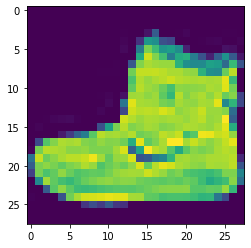

In [4]:
plt.imshow(X_train[0,:,:,0]);

In [5]:
print(X_train[0].shape)
print(y_train.shape)
print(y_train[0])

(28, 28, 1)
(60000,)
9


In [53]:
inp = tf.keras.layers.InputLayer(input_shape=[28,28,1])

conv0 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1,
                               padding='same', activation='relu', kernel_initializer='he_normal')
maxpool0 = tf.keras.layers.MaxPooling2D(2, padding='same')

conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                               padding='same', activation='relu', kernel_initializer='he_normal')
maxpool1 = tf.keras.layers.MaxPooling2D(2, padding='same')

model = Sequential()
model.add(inp)
model.add(conv0)
model.add(maxpool0)
model.add(conv1)
model.add(maxpool1)
model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))

opt = tf.keras.optimizers.RMSprop(momentum=0.9)
# opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
# model.build()
callback = tf.keras.callbacks.EarlyStopping(patience=5)
# model.summary()

In [54]:
model.fit(X_train, y_train, batch_size=32, callbacks=[callback], validation_split=0.2)

1500/1500 [==============================] - 13s 9ms/step - loss: 2.3709 - root_mean_squared_error: 5.2670 - val_loss: 0.6924 - val_root_mean_squared_error: 5.2332


In [55]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7196 - root_mean_squared_error: 5.2603


[0.7196023464202881, 5.260286331176758]

[5.11845322e-09 1.02177026e-07 9.78159308e-01 2.39115810e-10
 1.73035804e-02 6.36663257e-23 4.53706551e-03 1.62976875e-30
 3.37477091e-09 1.24153913e-21]
2


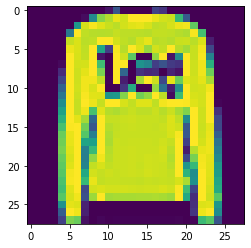

In [56]:
predictions = model.predict(X_test)
print(predictions[1])
plt.imshow(X_test[1,:,:,0])
print(y_test[1])

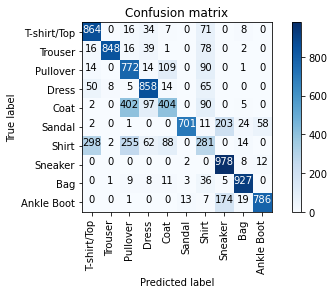

In [57]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1) # predictions classes to 1hot vectors 
confusion_mtx  = confusion_matrix(y_test, y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = ['T-shirt/Top','Trouser','Pullover',
                       'Dress','Coat','Sandal','Shirt','Sneaker',
                       'Bag','Ankle Boot'])